<a href="https://colab.research.google.com/github/andracristiana/acumVinePapa/blob/master/MM2024_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lecture 2 ##

Linear regression

**Importing a file as a dataframe**

To access data files in google drive from colab, you must first "mount" the drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to the text file in Google Drive
file_path = '/content/drive/My Drive/MathModelling/Age_Distance.txt'

# Read the text file into a Pandas DataFrame
mydataframe = pd.read_csv(file_path, delimiter='\t')  # Adjust delimiter based on your file format


**Plotting the columns against each other**

Text(0, 0.5, 'Ydata')

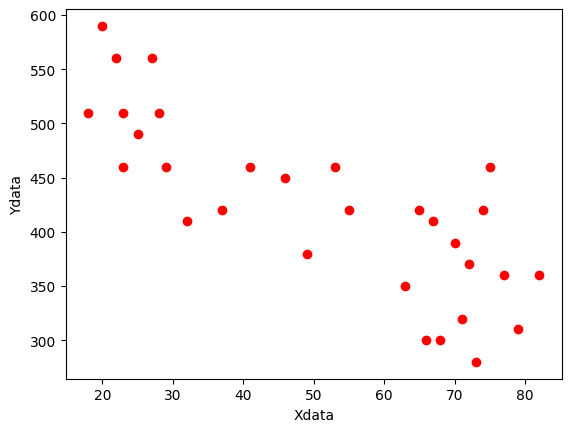

In [ ]:
import matplotlib.pyplot as plt
plt.plot(mydataframe.iloc[:,0], mydataframe.iloc[:,1],marker='o', linestyle="", color = 'red')
plt.xlabel('Xdata')
plt.ylabel('Ydata')

**Linear regression using sklearn**

This was how we did it last semester in Enzyme Technology

In [ ]:
from sklearn.linear_model import LinearRegression
x = mydataframe["Age"]
x = x.values.reshape(-1,1) #row to column
y = mydataframe["Distance"]

m = LinearRegression()
m.fit (x,y)
yfit = m.coef_*x + m.intercept_ # y = mx + b    intercept_ is intercept on y axis, coef_ is slope

#Print coefficients
print("Slope: \n", m.coef_)
print("Intercept: \n", m.intercept_)

Slope: 
 [-3.00683537]
Intercept: 
 576.6819371727748


**Linear regression using statsmodels.api ordinary least squares function**

Here is some documentation that might be useful:

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

Interpretting OLS output - not the most detailed description, but if you are completely lost then start here:
https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     50.21
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           1.04e-07
Time:                        13:19:37   Log-Likelihood:                -158.75
No. Observations:                  30   AIC:                             321.5
Df Residuals:                      28   BIC:                             324.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.6819     23.471     24.570      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/regressionplots.py:157: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


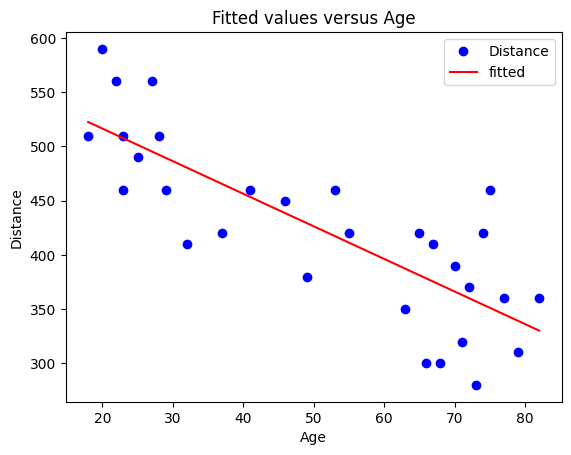

In [ ]:
#Using Statsmodels ordinary least squares (ols) function
import statsmodels.api as sm
x = mydataframe["Age"]
y = mydataframe["Distance"]
x = sm.add_constant(x)

my_model = sm.OLS(y,x).fit()  #"my_model" is just the name you give to your results
print(my_model.summary())

#plotting values
fig,ax = plt.subplots()
fig = sm.graphics.plot_fit(my_model,1,ax=ax, vlines = False, ls = "-", marker = "None")

**Calling results from statsmodels.api ols**

The full list is here:
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults


Here are some useful ones - look them up and make note of what they do:

bse

fvalue

fittedvalues

mse_resid

mse_total

params

nobs

resid

resid_pearson

rsquared

ssr

dfresid #not in the list, but useful - can you guess what it is?

In [ ]:
my_model.params #you can call any of the above results like this

const    576.681937
Age       -3.006835
dtype: float64